<a href="https://colab.research.google.com/github/AnnaKul5/Strongin-s-method/blob/main/Strongin_s_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Box(children=(Label(value='F(x) = '), BoundedFloatText(value=2.0, layout=Layout(width='50px'), max=1000.0, min…

Box(children=(Label(value='x ∈ {'), BoundedFloatText(value=0.0, layout=Layout(width='50px'), min=-1000.0, step…

Dropdown(description='Метод Стронгина ', index=1, layout=Layout(width='330px'), options=('Фиксированное значен…

BoundedFloatText(value=0.0, description='Параметр метода m ', layout=Layout(width='271px'), step=0.1, style=De…

BoundedFloatText(value=2.0, description='Параметр метода r ', layout=Layout(width='270px'), min=1.0, step=0.1,…

BoundedFloatText(value=0.001, description='Допустимая погрешность ', layout=Layout(width='270px'), max=1.0, st…

BoundedIntText(value=800, description='Максимальное число итераций ', layout=Layout(width='270px'), max=10000,…

Button(description='Расчёт', style=ButtonStyle())

BoundedFloatText(value=0.0, description='Найденный минимум ', disabled=True, layout=Layout(width='400px'), max…

BoundedFloatText(value=0.0, description='Найденная координата ', disabled=True, layout=Layout(width='400px'), …

BoundedIntText(value=0, description='Число проведённых итераций ', disabled=True, layout=Layout(width='400px')…

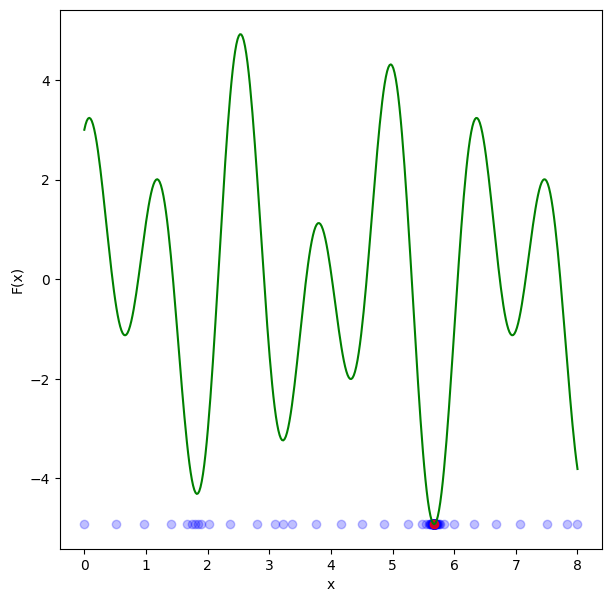

In [1]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import numpy as np
from matplotlib import pyplot as plt

from ipywidgets import (
    interact,
    Dropdown,
    BoundedFloatText,
    BoundedIntText,
    Button,
    Box,
    Layout,
    Label
  )

box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    width='100%')

items_equation = [
  Label(value='F(x) = '),
  BoundedFloatText(
    value=2,
    step=0.1,
    min = -1000,
    max = 1000,
    disabled=False,
    layout=Layout(width='50px')
),
  Label(value='sin'),
  BoundedFloatText(
    value=3,
    step=0.1,
    min = -1000,
    max = 1000,
    disabled=False,
    layout=Layout(width='50px')
),
  Label(value='x + '),
  BoundedFloatText(
    value=3,
    step=0.1,
    min = -1000,
    max = 1000,
    disabled=False,
    layout=widgets.Layout(width='50px')
),
  Label(value='cos'),
  BoundedFloatText(
    value=5,
    step=0.1,
    min = -1000,
    max = 1000,
    disabled=False,
    layout=widgets.Layout(width='50px')
),
  Label(value='x')
]

box_auto = Box(children=items_equation, layout=box_layout)

items_x = [
  Label(value='x ∈ {'),
  BoundedFloatText(
    value=0,
    min = -1000,
    step=0.1,
    disabled=False,
    layout=widgets.Layout(width='50px')
    ),
  Label(value=','),
  BoundedFloatText(
    value=8,
    step=0.1,
    max = 1000,
    disabled=False,
    layout=Layout(width='50px')
),
  Label(value='}')
]

box_x = Box(children=items_x, layout=box_layout)

items_UI = {
  'method': Dropdown(
      options=['Фиксированное значение m', 'Задать значение параметра r'],
      value='Задать значение параметра r',
      description='Метод Стронгина ',
      disabled=False,
      layout = Layout(width='330px'),
      style = {'description_width': 'initial'}
  ),
  'm': BoundedFloatText(
    step=0.1,
    min=0,
    value=0,
    disabled=False,
    style = {'description_width': '200px'},
    layout = Layout(width='271px'),
    description = 'Параметр метода m '
),
  'r': BoundedFloatText(
    step=0.1,
    min=1.0,
    value=2,
    disabled=False,
    style = {'description_width': '200px'},
    layout = Layout(width='270px'),
    description = 'Параметр метода r '
),
  'eps': BoundedFloatText(
    step=0.001,
    value=0.001,
    min = 0,
    max = 1,
    disabled=False,
    description='Допустимая погрешность ',
    style = {'description_width': '200px'},
    layout=Layout(width='270px')
),
  'n': BoundedIntText(
    step=1,
    value=800,
    max = 10000,
    disabled=False,
    description='Максимальное число итераций ',
    style = {'description_width': '200px'},
    layout=Layout(width='270px')
)
}

items_answer = {
  'y':  BoundedFloatText(
    disabled=True,
    min = -1000,
    max = 1000,
    value = 0,
    description='Найденный минимум ',
    style = {'description_width': '200px'},
    layout=Layout(width='400px')
  ),
  'x': BoundedFloatText(
    disabled=True,
    min = -1000,
    max = 1000,
    value = 0,
    description='Найденная координата ',
    style = {'description_width': '200px'},
    layout=Layout(width='400px')
  ),
  'n': BoundedIntText(
    disabled=True,
    min = 0,
    max = 1000,
    value = 0,
    description='Число проведённых итераций ',
    style = {'description_width': '200px'},
    layout=Layout(width='400px')
  ),
}

calculation_button = Button(description='Расчёт', disabled=False)


def ShowUI():
  display(box_auto)
  display(box_x)
  for v in items_UI.values():
    display(v)
  display(calculation_button)
  pass

def ShowAnswer():
  for v in items_answer.values():
    display(v)
  pass

def getF(list1):
  from math import sin, cos
  A = list1[1].value
  B = list1[3].value
  C = list1[5].value
  D = list1[7].value
  f = lambda x : A*sin(B*x)+C*cos(D*x)
  return f

def Strongin(f, x_left, x_right, eps, n, r, m, method):
  x = np.array([x_left, x_right])
  new_x = min(x_left, x_right)

  for i in range(n):
    x = np.sort(x)
    y = np.vectorize(f)(x)

    if method == 'Задать значение параметра r':
      M = np.empty(len(x)-1)
      for j in range(len(x)-1):
        M[j] = abs( y[j+1]-y[j] ) / ( x[j+1]-x[j] )
      if max(M) > 0:
        m = r * max(M)
      elif max(M) == 0:
        m = 1

    R = np.empty(len(x)-1)
    for j in range(len(x)-1):
      R[j] = m*( x[j+1]-x[j] ) + ( y[j+1]-y[j] )**2 / (m*( x[j+1]-x[j] )) - 2*(y[j+1]+y[j])

    t = np.argmax(R)
    new_x = ( x[t+1]+x[t] )/2 - ( y[t+1]-y[t] )/(2*m)
    x = np.append(x, new_x)

    e = abs(x[t+1]-x[t])
    if e < eps:
      return (x[np.argmin(y)], i, x)

  return (x[np.argmin(y)], n, x)


def Go(smth):

  f = getF(items_equation)

  fr = max(items_equation[3].value, items_equation[7].value)
  x_left = items_x[1].value
  x_right = items_x[3].value
  n = int((x_right - x_left) * fr * 10)
  xs = np.linspace(x_left, x_right, n)
  Y = np.vectorize(f)(xs)

  plt.subplots(figsize=(7, 7))
  plt.plot(xs, Y, color='green')
  plt.ylabel('F(x)')
  plt.xlabel('x')

  r = items_UI['r'].value
  m = items_UI['m'].value
  eps = items_UI['eps'].value
  n = items_UI['n'].value
  method = items_UI['method'].value
  res = None

  res = Strongin(f, x_left, x_right, eps, n, r, m, method)

  x = res[0]
  y = f(res[0])
  n = res[1]
  items_answer['x'].value = x
  items_answer['y'].value = y
  items_answer['n'].value = n
  plt.scatter(res[2], len(res[2])*[Y.min()], color='blue', alpha=0.25)
  plt.scatter(x, y, color='red', alpha=0.8)

  pass


calculation_button.on_click(Go)
ShowUI()
ShowAnswer()
